<font size= 5> Customer Segmentation </font>

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Import Data - Pre cleaned CSV
churn=pd.read_csv('churn_clean.csv')

In [3]:
churn.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

<font size ='4'> Data Preperation </font>

The analysis will utilize:
- Age: Continuous variable
- Income: Continuous variable
- MonthlyCharge: Continuous variable


In [5]:
churn1=churn[['Age','Income','MonthlyCharge']]
churn1.shape

(10000, 3)

In [6]:
churn1.head()

,Age,Income,MonthlyCharge
0,68,28561.99,172.455519
1,27,21704.77,242.632554
2,50,9609.57,159.947583
3,48,18925.23,119.956840
4,83,40074.19,149.948316


In [7]:
churn1.isnull().sum()

Age              0
Income           0
MonthlyCharge    0
dtype: int64

In [8]:
churn1.dtypes

Age                int64
Income           float64
MonthlyCharge    float64
dtype: object

Standardize data for the k-means algorithm

In [9]:
scaler=StandardScaler()
scaler.fit(churn1)
scaled=scaler.transform(churn1)
churn_scaled=pd.DataFrame(scaled, columns=churn1.columns)

In [10]:
churn_scaled.head()

,Age,Income,MonthlyCharge
0,0.720925,-0.398778,-0.003943
1,-1.259957,-0.641954,1.630326
2,-0.148730,-1.070885,-0.295225
3,-0.245359,-0.740525,-1.226521
4,1.445638,0.009478,-0.528086


Analyze correlaiton - correlated variables impact k-means' ability to cluster each sample

In [11]:
correlation=churn_scaled.corr()
correlation

,Age,Income,MonthlyCharge
Age,1.000000,-0.004091,0.010729
Income,-0.004091,1.000000,-0.003014
MonthlyCharge,0.010729,-0.003014,1.000000


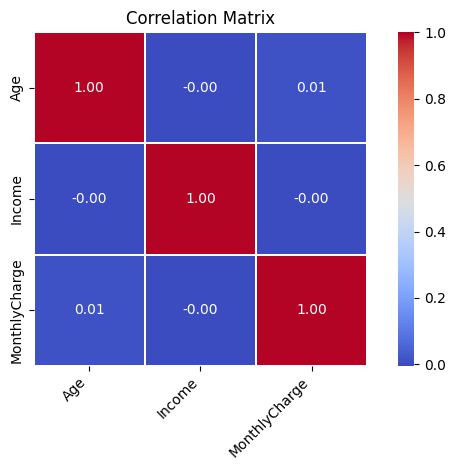

In [12]:
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.1)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<font size='4'> Data Analysis </font>

<font size='4'> E1: Output and Intermediate Calculations </font>

The elbow method was used to select four clusters. After four, the inertia values continue to go down but do so at a diminishing rate.

In [13]:
#Inertia and silhouette for different K
ks=range(2,15)
inertias=[]
avg_silhouette= [] 
mapping={}

for k in ks:
	model=KMeans(n_clusters=k)		
	model.fit(churn_scaled)				
	inertias.append(model.inertia_)	
	avg_silhouette.append(silhouette_score(churn_scaled, model.labels_))	
	mapping[k] = model.inertia_



In [14]:
#Inertia values for each K
for key, val in mapping.items():
    print(f'{key} : {int(val)}')

2 : 22480
3 : 17955
4 : 13374
5 : 11501
6 : 10425
7 : 9585
8 : 8708
9 : 8300
10 : 7574
11 : 7088
12 : 6651
13 : 6241
14 : 5947


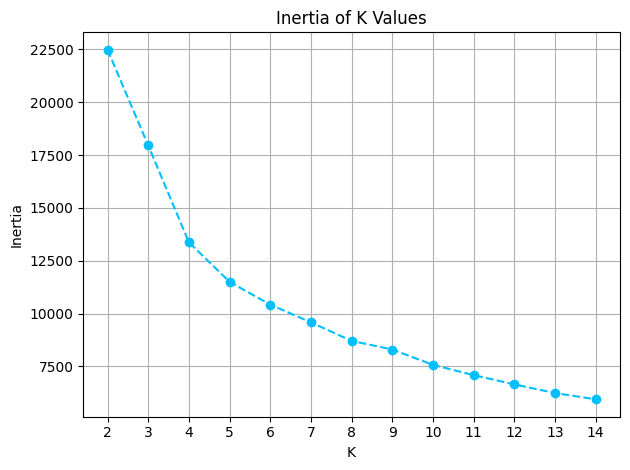

In [16]:
#Plot the inertias
plt.plot(ks, inertias, '-o', color='deepskyblue', linestyle='--')
plt.xlabel('K')
plt.xticks(ks)
plt.ylabel('Inertia')
plt.title('Inertia of K Values')
plt.grid()
plt.tight_layout()
plt.show();

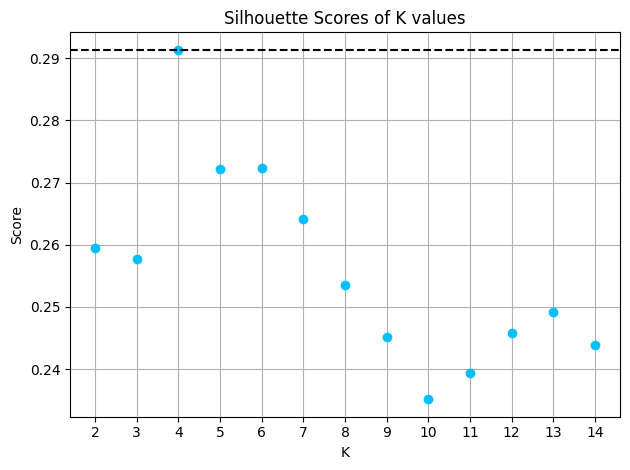

In [17]:
#Plot Silhouette scores
plt.plot(ks, avg_silhouette, 'o', color='deepskyblue')
plt.title('Silhouette Scores of K values')
plt.xlabel('K')
plt.xticks(ks)
plt.ylabel('Score')
plt.axhline(y=max(avg_silhouette), linestyle='--', color='black')
plt.grid()
plt.tight_layout()
plt.show();

<font size='4'> K-Means Model </font>

In [18]:
kmeans=KMeans(n_clusters=4, n_init=20, init='random', algorithm='elkan', random_state=13)
kmeans.fit(churn_scaled)


KMeans(algorithm='elkan', init='random', n_clusters=4, n_init=20,
       random_state=13)

In [19]:
#Obtain the cluster labels
labels=kmeans.labels_
churn_scaled['Cluster'] = labels

In [20]:
#Display centroids and inertia
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

[[ 0.94259943 -0.33126321 -0.44465186]
 [-0.89466974 -0.32774665 -0.48739659]
 [-0.00693275  1.86216934 -0.14344271]
 [-0.02055546 -0.22945756  1.35869557]]
13374.510077494419


<font size = 4> Results Visualized </font>

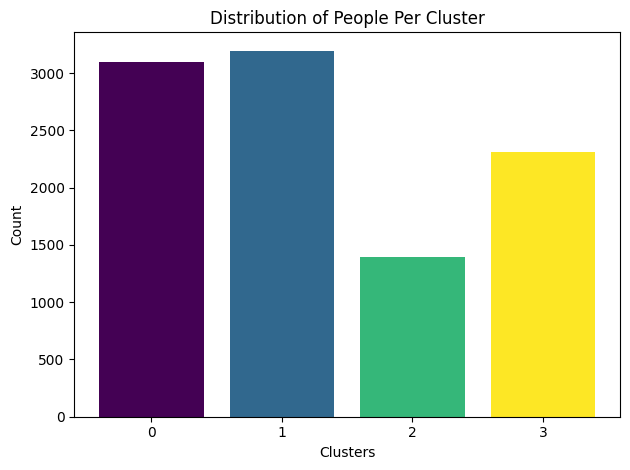

In [21]:
counts=churn_scaled.Cluster.value_counts()
sorted_counts=counts.sort_index()
viridis = cm.get_cmap('viridis', 4)
colors = [viridis(i) for i in range(4)] 

plt.bar(sorted_counts.index.astype(str), sorted_counts.values, color=colors)  
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.title('Distribution of People Per Cluster')
plt.tight_layout()
plt.show()

The three-dimensional plot visualizes how the churn data is grouped based on all three features, revealing four distinct clusters that represent different customer segments.

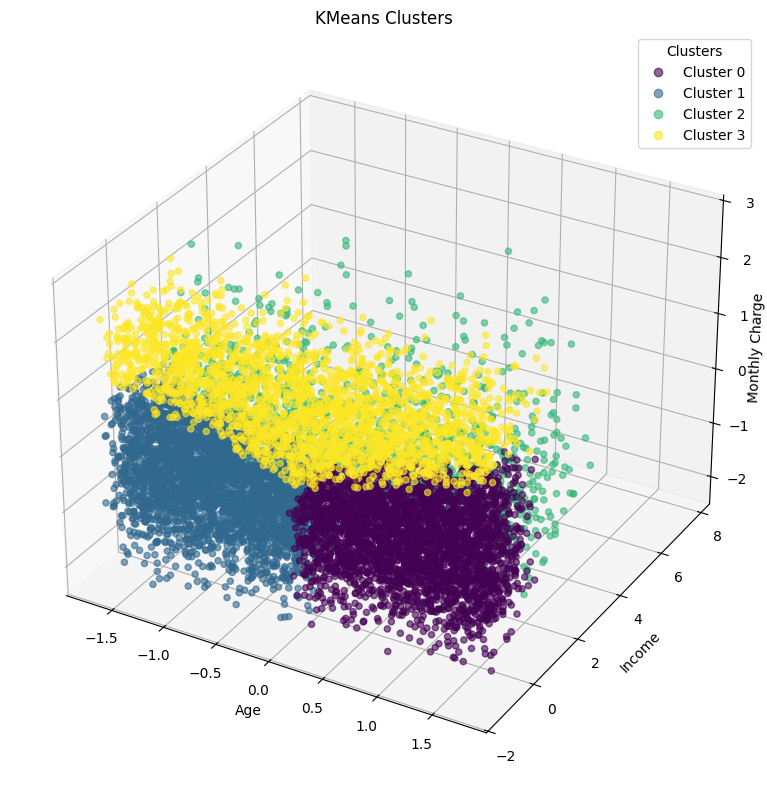

In [22]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(churn_scaled['Age'], churn_scaled['Income'], churn_scaled['MonthlyCharge'], 
                     c=churn_scaled['Cluster'], cmap='viridis', alpha=0.6)

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Monthly Charge', labelpad=-3)
ax.set_title('KMeans Clusters')

#Legend
legend_labels = {i: f'Cluster {i}' for i in range(len(scatter.get_array()))}
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels.values(), title='Clusters')


plt.tight_layout()
plt.show()

In [23]:
#Add labels to original churn data 
churn['Cluster']=labels
churn.Cluster.value_counts()

1    3197
0    3097
3    2309
2    1397
Name: Cluster, dtype: int64

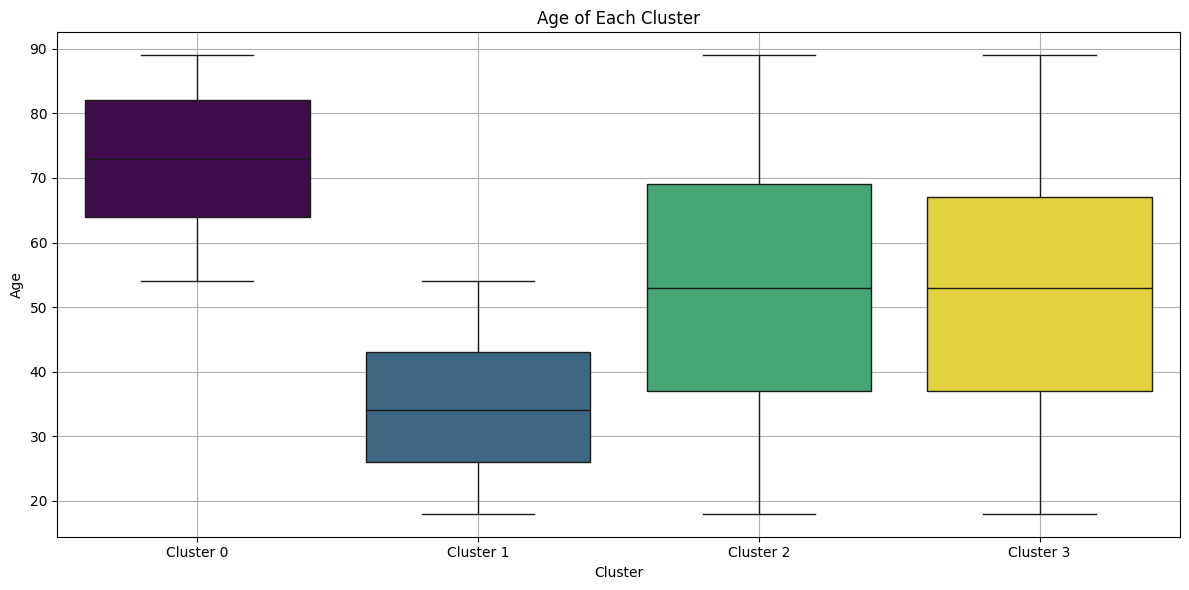

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Age', data=analysis, hue='Cluster', palette='viridis', legend=False)
plt.title('Age of Each Cluster')
#plt.xlabel('Cluster')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.grid()
plt.tight_layout()
plt.show()

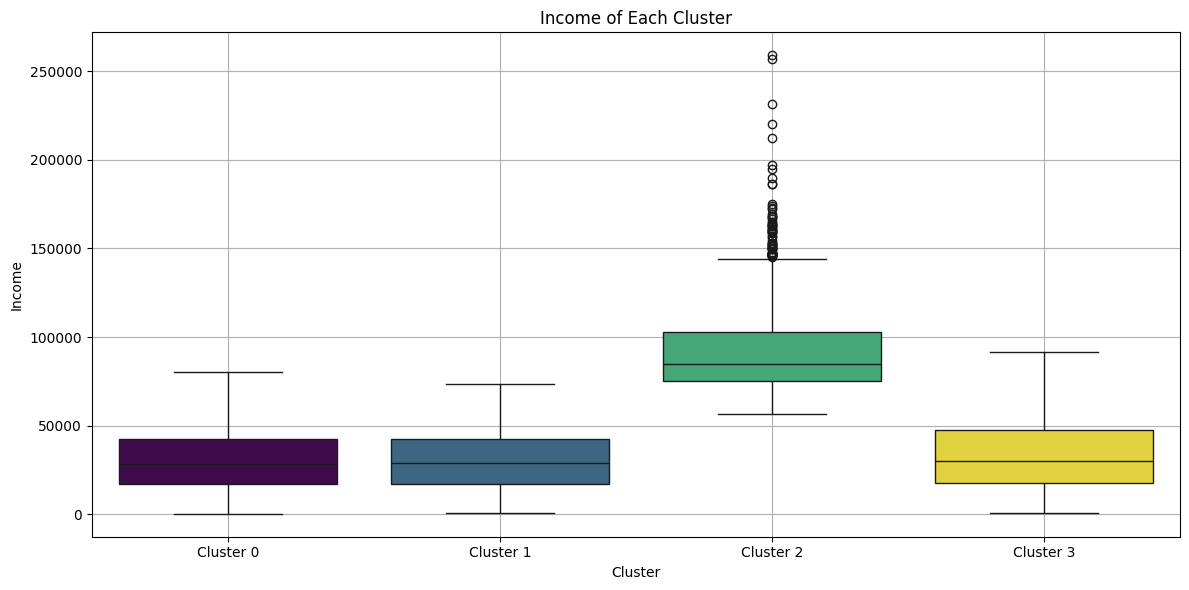

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Income', data=analysis, hue='Cluster', palette='viridis', legend=False)
plt.title('Income of Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.tight_layout()
plt.grid()
plt.show()

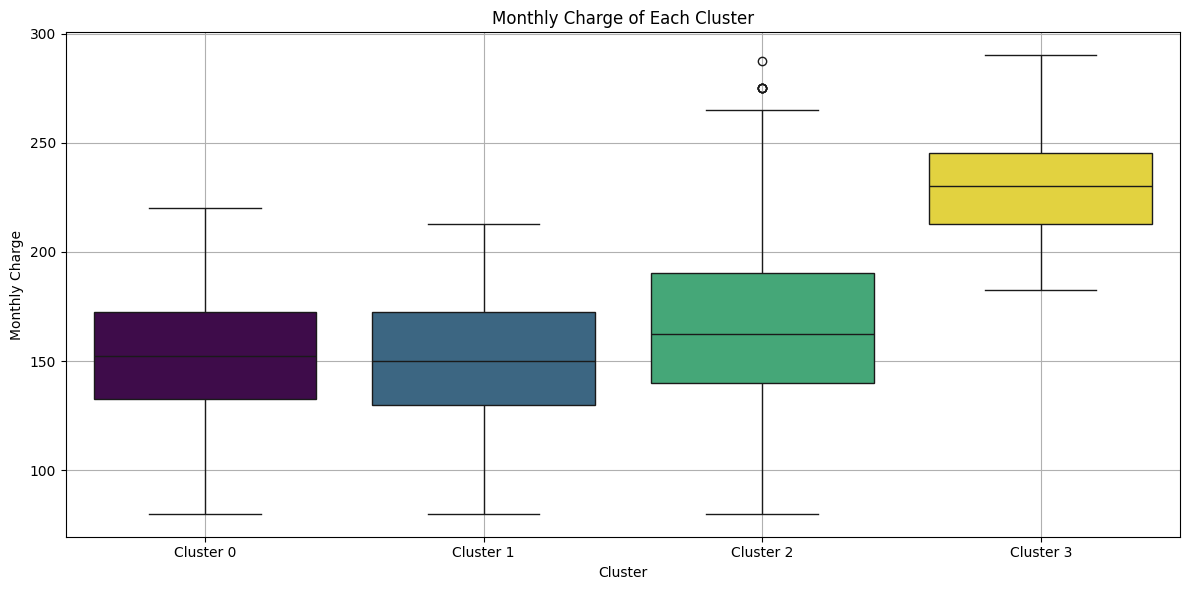

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='MonthlyCharge', data=analysis, hue='Cluster', palette='viridis', legend=False)
plt.title('Monthly Charge of Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monthly Charge')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.grid()
plt.tight_layout()
plt.show()

In [24]:
#data frame for analysis
analysis=churn[['Age', 'Income', 'MonthlyCharge', 'Tenure', 'Cluster', 'Bandwidth_GB_Year']]

In [25]:
#Data set avg v avg by cluster
print(analysis.mean().round(2))
print()
print(analysis.groupby('Cluster').mean().round(2))

Age                     53.08
Income               39806.93
MonthlyCharge          172.62
Tenure                  34.53
Cluster                  1.29
Bandwidth_GB_Year     3392.34
dtype: float64

           Age    Income  MonthlyCharge  Tenure  Bandwidth_GB_Year
Cluster                                                           
0        72.59  30461.63         153.54   34.86            3284.26
1        34.57  30562.40         151.68   34.08            3343.46
2        52.95  92330.21         166.43   34.65            3384.61
3        52.62  33363.49         230.97   34.63            3609.67


<font size=4> Implications </font>

The clusters can be used to implement targeted marketing and relationship management strategies, so the company can tailor its offerings and resources to each distinct segment.

- Cluster 0:
    - Strategy: Offer products that are easy to use and focus on clear communication and customer support
    - Product offering: warranties

- Cluster 1:
    - Strategy: Market the latest technology, focusing on social media as the outreach channel 
    - Product offering: Unlimited data packages

- Cluster 2:
    - Strategy: Position products as premium, emphasizing security and luxury features.
    - Product Offering: High speed service plans, additional device security

- Clsuter 3:
    - Strategy: Focus on superior service quality, emphasizing reliability.
    - Product Offering: High speed internet, unlimited service plans.